In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df = pd.read_excel('Train_dataset.xlsx')
df1 = pd.read_excel('Test_dataset.xlsx')

In [52]:
df.head()


people_ID        Region  Gender Designation             Name Married  \
0          1  Bhubaneshwar  Female         Mrs            mansi       1   
1          2  Bhubaneshwar  Female         Mrs        riya masi       1   
2          3  Bhubaneshwar  Female         Mrs           sunita       0   
3          4  Bhubaneshwar  Female         Mrs   anjali @ babli       1   
4          5  Bhubaneshwar  Female         Mrs  champa karketta       0   

   Children     Occupation Mode_transport  cases/1M  ...    HBB d-dimer  \
0       1.0         Farmer         Public         2  ...   93.0   233.0   
1       2.0         Farmer           Walk         2  ...   56.0   328.0   
2       1.0        Cleaner         Public         2  ...  137.0   213.0   
3       1.0         Driver            Car         2  ...  167.0   275.0   
4       2.0  Manufacturing            Car         2  ...  153.0   331.0   

   Heart rate  HDL cholesterol Charlson Index Blood Glucose  Insurance  \
0        82.0             58.0             27             7  3600000.0   
1        89.0             68.0              5             6  1600000.0   
2        77.0             43.0             40             6  3400000.0   
3        64.0             60.0             27             7   700000.0   
4        71.0             64.0             32             7  3200000.0   

    salary  FT/month  Infect_Prob  
0  1300000       2.0    49.135010  
1   400000       1.0    51.147880  
2   900000       1.0    73.224000  
3  2300000       1.0    48.779225  
4  1100000       1.0    87.868800  

[5 rows x 28 columns]

In [7]:
df1.head()

people_ID Region  Gender Designation                Name Married  Children  \
0       5942  Delhi  Female         Mrs  smt rekha prajapat     YES         2   
1      18664  Delhi    Male          Mr              nirmal     YES         2   
2       5603  Delhi  Female         Mrs               pinky     YES         2   
3       5649  Delhi  Female         Mrs       pooja @aafrin     YES         2   
4       5099  Delhi  Female         Mrs              anjali     YES         2   

  Occupation Mode_transport  cases/1M  ...  Platelets  HBB  d-dimer  \
0     Driver         Public         4  ...        153  196      240   
1      Legal           Walk         4  ...         95  138      241   
2      Sales            Car         4  ...         40  166      236   
3      Sales            Car         4  ...         78   83      211   
4   Business            Car         4  ...        109  207      312   

   Heart rate HDL cholesterol Charlson Index  Blood Glucose  Insurance  \
0          85              53             17              3    3900000   
1          81              61              2              5    1800000   
2          88              47             24              3    5000000   
3          87              52             13              6    3100000   
4          94              68             39              5    2300000   

    salary  FT/month  
0  1300000         1  
1  1300000         1  
2  2000000         2  
3   600000         2  
4  1500000         1  

[5 rows x 27 columns]

In [36]:
p = df
p.replace("YES", "1",inplace = True) 
p.replace("NO","0",inplace = True)

<bound method DataFrame.dropna of        people_ID        Region  Gender Designation                 Name  \
0              1  Bhubaneshwar  Female         Mrs                mansi   
1              2  Bhubaneshwar  Female         Mrs            riya masi   
2              3  Bhubaneshwar  Female         Mrs               sunita   
3              4  Bhubaneshwar  Female         Mrs       anjali @ babli   
4              5  Bhubaneshwar  Female         Mrs      champa karketta   
...          ...           ...     ...         ...                  ...   
10709      22691     Bengaluru    Male          Mr               ashish   
10710      22692     Bengaluru    Male          Mr  mohd mujahid ansari   
10711      22693     Bengaluru    Male          Mr           munnakumar   
10712      22694     Bengaluru    Male          Mr              prakash   
10713      22695     Bengaluru    Male          Mr      mehboob mehandi   

      Married  Children     Occupation Mode_transport  cases/1M  

In [16]:
p.dtypes

people_ID                   int64
Region                     object
Gender                     object
Designation                object
Name                       object
Married                    object
Children                  float64
Occupation                 object
Mode_transport             object
cases/1M                    int64
Deaths/1M                   int64
comorbidity                object
Age                         int64
Coma score                  int64
Pulmonary score            object
cardiological pressure     object
Diuresis                  float64
Platelets                 float64
HBB                       float64
d-dimer                   float64
Heart rate                float64
HDL cholesterol           float64
Charlson Index              int64
Blood Glucose               int64
Insurance                 float64
salary                      int64
FT/month                  float64
Infect_Prob               float64
dtype: object

In [21]:
x = p.iloc[:,0:27]
y = p.iloc[:,27:28]
print(x)

       people_ID        Region  Gender Designation             Name Married  \
0              1  Bhubaneshwar  Female         Mrs            mansi     YES   
2              3  Bhubaneshwar  Female         Mrs           sunita      NO   
3              4  Bhubaneshwar  Female         Mrs   anjali @ babli     YES   
4              5  Bhubaneshwar  Female         Mrs  champa karketta      NO   
5              6  Bhubaneshwar  Female         Mrs          sandhya     YES   
...          ...           ...     ...         ...              ...     ...   
10708      22690     Bengaluru    Male          Mr      manoj kumar     YES   
10709      22691     Bengaluru    Male          Mr           ashish      NO   
10711      22693     Bengaluru    Male          Mr       munnakumar     YES   
10712      22694     Bengaluru    Male          Mr          prakash     YES   
10713      22695     Bengaluru    Male          Mr  mehboob mehandi      NO   

       Children     Occupation Mode_transport  case

In [20]:
print(y)

       Infect_Prob
0        49.135010
2        73.224000
3        48.779225
4        87.868800
5        49.518345
...            ...
10708    53.741750
10709    41.981760
10711    47.708533
10712    53.803565
10713    68.342400

[6777 rows x 1 columns]


In [22]:
bestfeatures = SelectKBest(score_func = chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.Dataframe(fit.scores_)
dfcolumns = pd.Dataframe(x.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

ValueError: could not convert string to float: 'Bhubaneshwar'

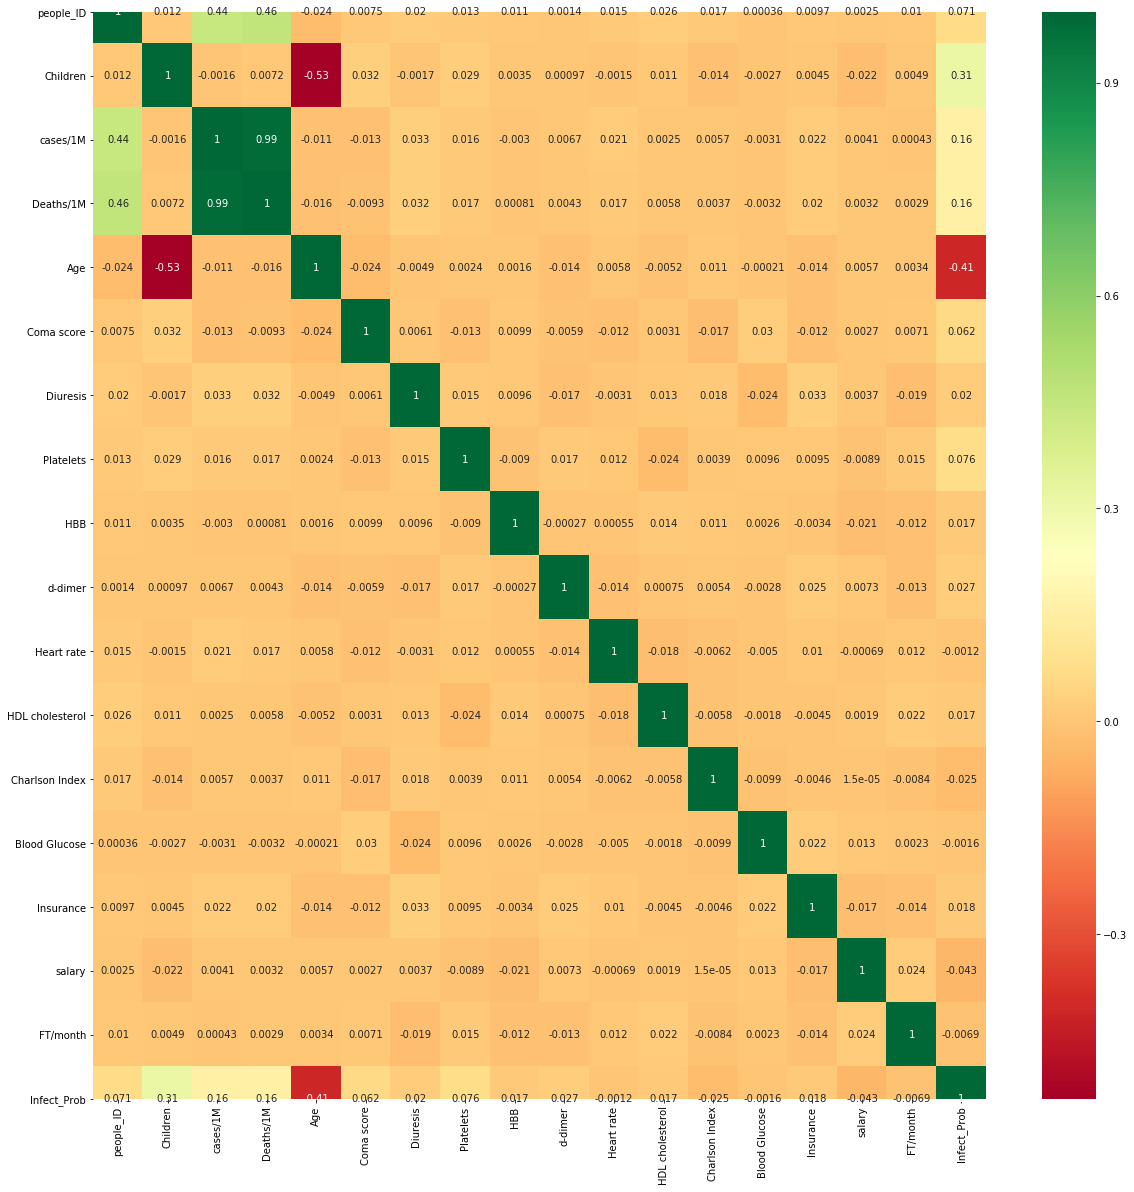

In [25]:
X = p.iloc[:,0:27]  #independent columns
y = p.iloc[:,27:28]    #target column i.e price range
#get correlations of each features in dataset
corrmat = p.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sn.heatmap(p[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
Deaths/1M                   int64
comorbidity                object
Age                         int64
Coma score                  int64
Pulmonary score            object
cardiological pressure     object
Diuresis                  float64
Platelets 

In [157]:
p=p.fillna(0)
p.replace(" ","0",inplace =True)
p['Pulmonary score'] = p['Pulmonary score'].str.strip('<')
p['Pulmonary score'] = pd.to_numeric(p['Pulmonary score'])
p['Married'] = pd.to_numeric(p['Married'])
a = p['cardiological pressure'].unique()
b = p['Pulmonary score'].unique()
c = p['comorbidity'].unique()
d = p['Mode_transport'].unique()
e = p['Occupation'].unique()
print("cardiological pressure:",a)
print("Pulmonary score       :",b)
print("comorbidty            :",c)
print("Mode_transport        :",d)
print("Occupation            :",e)

cardiological pressure: ['Normal' 'Stage-02' 'Elevated' 'Stage-01' 0]
Pulmonary score       : [400 100 300 200]
comorbidty            : ['Hypertension' 'Diabetes' 'None' 'Coronary Heart Disease' 0]
Mode_transport        : ['Public' 'Walk' 'Car' 0]
Occupation            : ['Farmer' 'Cleaner' 'Driver' 'Manufacturing' 'Clerk' 'Sales' 0 'Business'
 'Researcher' 'Legal']


In [96]:
new_df = p.filter(['people_ID','Married','Children','cases/1M','Deaths/1M','Age','Coma score','Pulmonary score','Diuresis','Platelets','HBB','d-dimer','Heart rate','HDL cholesterol','Charlson Index','Blood Glucose','Insurance','salary','FT/month'],axis = 1)

In [97]:
new_df['Pulmonary score'] = new_df['Pulmonary score'].str.strip('<')


In [98]:
new_df['Pulmonary score'] = pd.to_numeric(new_df['Pulmonary score'])
new_df['Married'] = pd.to_numeric(new_df['Married'])
new_df.replace(" ","0",inplace = True)
#new_df = new_df.dropna()

In [101]:
new_df = new_df.fillna(0)
new_df.replace(" ","0",inplace =True)
new_df.head()

people_ID  Married  Children  cases/1M  Deaths/1M  Age  Coma score  \
0          1        1       1.0         2          0   68           8   
1          2        1       2.0         2          0   64          15   
2          3        0       1.0         2          0   19          13   
3          4        1       1.0         2          0   33           9   
4          5        0       2.0         2          0   23           7   

   Pulmonary score  Diuresis  Platelets    HBB  d-dimer  Heart rate  \
0              400     441.0      154.0   93.0    233.0        82.0   
1              100       0.0      121.0   56.0    328.0        89.0   
2              300     416.0      124.0  137.0    213.0        77.0   
3              200     410.0       98.0  167.0    275.0        64.0   
4              400     390.0       21.0  153.0    331.0        71.0   

   HDL cholesterol  Charlson Index  Blood Glucose  Insurance   salary  \
0             58.0              27              7  3600000.0  1300000   
1             68.0               5              6  1600000.0   400000   
2             43.0              40              6  3400000.0   900000   
3             60.0              27              7   700000.0  2300000   
4             64.0              32              7  3200000.0  1100000   

   FT/month  
0       2.0  
1       1.0  
2       1.0  
3       1.0  
4       1.0

In [91]:
new_df.dtypes

people_ID            int64
Married              int64
Children           float64
cases/1M             int64
Deaths/1M            int64
Age                  int64
Coma score           int64
Pulmonary score      int64
Diuresis           float64
Platelets          float64
HBB                float64
d-dimer            float64
Heart rate         float64
HDL cholesterol    float64
Charlson Index       int64
Blood Glucose        int64
Insurance          float64
salary               int64
FT/month           float64
dtype: object

In [104]:
a =  list(new_df.mean())
b = list(new_df)
print(a)
print("---------")
print(b)

[10084.893783834235, 0.7915811088295688, 1.0319208512226992, 3.2858876236699643, 0.52324061974986, 42.08372223259287, 9.013067015120404, 250.50401344035842, 260.1740713085682, 80.22409930931491, 115.99747993279821, 246.6684711592309, 67.06505506813515, 52.46079895463879, 20.02809408250887, 5.015027067388464, 2375835.355609483, 1304713.459025574, 0.9368116483106216]
---------
['people_ID', 'Married', 'Children', 'cases/1M', 'Deaths/1M', 'Age', 'Coma score', 'Pulmonary score', 'Diuresis', 'Platelets', 'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol', 'Charlson Index', 'Blood Glucose', 'Insurance', 'salary', 'FT/month']


In [106]:
i = 0
j = 0
for i in new_df.index:
    for j in range(len(a)):
        new_df[b[j]][i] = new_df[b[j]][i]/a[j]
        print(new_df[b[j]][i])

C:\Users\Praty\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0
1
0.9690665701881332
0
0
1
0
1
1.6950190223874038
1.9196226735588777
0.8017415555396415
0.9445876844535694
1.2226933969813578
1.1055874320585697
1
1
1.5152565145140189
0
2.1349008667928664
0
1
1.9381331403762665
0
0
1
1
0
0.0
1.508274957796261
0.48276910871204226
1.3297200021492308
1.3270696625773275
1.2962059548272886
0
1
0.6734473397840084
0
1.0674504333964332
0
0
0.9690665701881332
0
0
0
1
1
1.5989295086466213
1.5456702046837716
1.1810601409562462
0.8635071965176407
1.1481389215556652
0.8196596479054914
1
1
1.4310755970410178
0
1.0674504333964332
0
1
0.9690665701881332
0
0
0
0
0
1.5758680253488335
1.2215780649920132
1.4396864491948402
1.1148567091190198
0.9542972854488647
1.1437111366123136
1
1
0.29463321115550367
1
1.0674504333964332
0
0
1.9381331403762665
0
0
0
0
1
1.4989964143562076
0.26176672821257424
1.3189941720168297
1.3418820753396201
1.0586735510448342
1.219958545719801
1
1
1.3468946795680168
0
1.0674504333964332
0
1
0.9690665701881332
0
0
0
0
0
1.4951528338065763
1.73264

In [109]:
g_df = new_df.round(3)
g_df.head()

people_ID  Married  Children  cases/1M  Deaths/1M  Age  Coma score  \
0          0        1      0.97         0          0    1           0   
1          0        1      1.94         0          0    1           1   
2          0        0      0.97         0          0    0           1   
3          0        1      0.97         0          0    0           0   
4          0        0      1.94         0          0    0           0   

   Pulmonary score  Diuresis  Platelets   HBB  d-dimer  Heart rate  \
0                1      1.70       1.92  0.80     0.94        1.22   
1                0      0.00       1.51  0.48     1.33        1.33   
2                1      1.60       1.55  1.18     0.86        1.15   
3                0      1.58       1.22  1.44     1.11        0.95   
4                1      1.50       0.26  1.32     1.34        1.06   

   HDL cholesterol  Charlson Index  Blood Glucose  Insurance  salary  FT/month  
0             1.11               1              1       1.52       0      2.13  
1             1.30               0              1       0.67       0      1.07  
2             0.82               1              1       1.43       0      1.07  
3             1.14               1              1       0.29       1      1.07  
4             1.22               1              1       1.35       0      1.07

In [162]:
from sklearn import model_selection
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB
X_FEATURES = ['people_ID','Married','Children','cases/1M','Deaths/1M','Age','Coma score','Diuresis','Platelets','HBB','d-dimer','Heart rate','HDL cholesterol','Charlson Index','Blood Glucose','Insurance','salary','FT/month']

x_features = p.loc[:,X_FEATURES].values.astype(float)

y_features = p.loc[:,['Infect_Prob']].values.astype(int)


X_train, X_test, Y_train, Y_test = model_selection.train_test_split (x_features, y_features, test_size = 0.2 , random_state =0)

In [163]:
clf_ob = GaussianNB()
clf_ob.fit(X_train, Y_train)
y_pred = clf_ob.predict(X_test)
print("Accuracy",metrics.accuracy_score(Y_test,y_pred))

Accuracy 0.18292113859076062


C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
